# 1. Définition du Problème et Objectifs

## Contexte et Pertinence 

Dans un contexte mondial où la gestion efficace de l'énergie est devenue une priorité cruciale, notre projet vise à analyser la consommation d'énergie par département dans différents secteurs en France. L'objectif est de fournir une compréhension approfondie des modèles de consommation énergétique, qui est essentielle pour orienter les politiques énergétiques, promouvoir la durabilité et optimiser les ressources. Ce projet est particulièrement pertinent étant donné les défis actuels liés au changement climatique et à la transition énergétique. En examinant les données de consommation énergétique à l'échelle des communes, nous pouvons identifier des tendances spécifiques, des anomalies et des opportunités d'amélioration. Cela permettra aux décideurs, aux entreprises et aux consommateurs de prendre des mesures éclairées pour réduire la consommation d'énergie, améliorer l'efficacité énergétique et favoriser l'adoption d'énergies renouvelables. En outre, ce projet contribue à une meilleure compréhension des disparités régionales en matière de consommation d'énergie, offrant ainsi une perspective précieuse pour des interventions ciblées et personnalisées.  

## Objectifs du Projet

Notre projet, au cœur de l'intersection entre technologie, environnement et société, se fixe des objectifs ambitieux et significatifs :

**Cartographie de la Consommation Énergétique :** Notre premier objectif est de dresser une carte précise de la consommation d'énergie dans les différents départements français. En mettant en lumière ces données, nous souhaitons offrir une vision claire et détaillée de la répartition énergétique sur le territoire.

**Identification des Tendances et Anomalies :** Nous visons à décrypter les tendances sous-jacentes et à détecter d'éventuelles anomalies dans les habitudes de consommation énergétique. Cela permettra de comprendre les pratiques énergétiques actuelles et d'identifier les zones à haut potentiel d'amélioration.

**Analyse Comparative par Secteur :** Un autre objectif crucial est de comparer la consommation énergétique entre différents secteurs (résidentiel, industriel, commercial, etc.). Cela aidera à cerner les secteurs les plus énergivores et à envisager des stratégies d'optimisation.

**Prédiction des Tendances Futures :** Nous ambitionnons de développer des modèles prédictifs pour anticiper les évolutions futures de la consommation d'énergie. Ces prévisions seront essentielles pour planifier des stratégies énergétiques à long terme.

**Contribution à la Durabilité :** En offrant une compréhension approfondie de la consommation d'énergie, le projet aspire à contribuer activement à des initiatives de développement durable. Les insights générés pourraient inspirer des actions concrètes pour réduire l'empreinte énergétique.

**Support aux Décisions Politiques et Commerciales :** Fournir des données et des analyses fiables pour éclairer les décisions politiques et commerciales en matière de gestion de l'énergie. Cela inclut la recommandation de politiques efficaces et la sensibilisation aux meilleures pratiques en matière de consommation énergétique.

**Sensibilisation et Éducation :** Enfin, nous souhaitons utiliser nos résultats pour sensibiliser le public et les décideurs aux enjeux de la consommation d'énergie. L'objectif est de promouvoir une culture de consommation énergétique responsable et informée.

## Aspects techniques

### Packages

In [152]:
# Installation des packages

!pip install -q lxml
!pip install webdriver-manager
!pip install BeautifulSoup4
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install pygeos
!pip install topojson
!pip install seaborn

import requests
import re
import bs4
import lxml
import pandas as pd
import urllib
import seaborn

from urllib import request
from matplotlib import pyplot as plt

### URL

In [153]:
url_1 = "https://odre.opendatasoft.com/explore/embed/dataset/conso-departement-annuelle/table/?disjunctive.libelle_departement&disjunctive.libelle_region&disjunctive.e_operateurs&disjunctive.g_operateurs&refine.annee=2021&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJjb25zb3RvdGFsZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiM2NmMyYTUifV0sInhBeGlzIjoibGliZWxsZV9kZXBhcnRlbWVudCIsIm1heHBvaW50cyI6NTAsInNvcnQiOiIiLCJjb25maWciOnsiZGF0YXNldCI6ImNvbnNvLWRlcGFydGVtZW50LWFubnVlbGxlIiwib3B0aW9ucyI6eyJkaXNqdW5jdGl2ZS5saWJlbGxlX2RlcGFydGVtZW50Ijp0cnVlLCJkaXNqdW5jdGl2ZS5saWJlbGxlX3JlZ2lvbiI6dHJ1ZSwiZGlzanVuY3RpdmUuZV9vcGVyYXRldXJzIjp0cnVlLCJkaXNqdW5jdGl2ZS5nX29wZXJhdGV1cnMiOnRydWUsInJlZmluZS5hbm5lZSI6IjIwMjEifX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=3,17.56025,53.4375&basemap=jawg.light"
url_2 = "https://www.insee.fr/fr/statistiques/6436484?sommaire=6036904#tableau-figure1_radio1"
url_3 = "https://odre.opendatasoft.com/explore/dataset/temperature-quotidienne-departementale/information/?disjunctive.departement"
url_4 = "https://www.insee.fr/fr/statistiques/6436484?sommaire=6036904#tableau-figure1_radio1"
url_5 = "https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#bbox=-1052198,6661338,2597056,1619174&c=indicator&i=insee_rp_hist_1968.part_logt_vacant&s=2020&view=map9"
url_6 = "https://ufe-electricite.fr/watt-the-carte/deploiement-bornes-de-recharge-en-france/dans-les-territoires/"
url_7 = "https://www.carburants.org/borne-electrique/departements/"
url_8 : "https://www.observatoire-des-territoires.gouv.fr/nombre-dentreprises-par-secteurs-dactivite"

# 2. Collecte et Exploration des Données (Communes)

## Sources de Données

### Bases de données pre-existantes

##### Consommation totale d'énergie par commune

In [154]:
table_conso_com = pd.read_csv('conso_energie.csv',sep=';')
table_conso_com.head()

# Affichage de la table
table_conso_com.head()

/tmp/ipykernel_295/1480092423.py:1: DtypeWarning: Columns (6,14,24,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  table_conso_com = pd.read_csv('conso_energie.csv',sep=';')


,operateur,annee,filiere,consoa,pdla,nombre_maille_secretisees_a,indquala,consoi,pdli,nombre_maille_secretisees_i,...,libelle_commune,code_epci,libelle_epci,code_departement,libelle_departement,code_region,libelle_region,id_filiere,consototale,code_postal
0,GRDF,2021,Gaz,0.0,0,0,0.0,0.00000,0,1,...,Armeau,248900334,CA du Grand Sénonais,89,Yonne,27.0,Bourgogne-Franche-Comté,200.0,2317.51553,89500
1,GRDF,2021,Gaz,0.0,0,0,0.0,0.00000,0,1,...,Branches,200067114,CA de l'Auxerrois,89,Yonne,27.0,Bourgogne-Franche-Comté,200.0,1905.29787,89113
2,GRDF,2021,Gaz,0.0,0,0,0.0,1895.35634,9,0,...,Brienon-sur-Armançon,200067304,CC Serein et Armance,89,Yonne,27.0,Bourgogne-Franche-Comté,200.0,16756.07274,89210/89210
3,GRDF,2021,Gaz,0.0,0,0,0.0,0.00000,0,0,...,Brion,248900938,CC du Jovinien,89,Yonne,27.0,Bourgogne-Franche-Comté,200.0,1696.15670,89400
4,GRDF,2021,Gaz,0.0,0,1,0.0,0.00000,0,0,...,La Celle-Saint-Cyr,248900938,CC du Jovinien,89,Yonne,27.0,Bourgogne-Franche-Comté,200.0,4395.90677,89116


##### Logements vacants par commune

In [155]:
# url = https://www.data.gouv.fr/fr/datasets/niveau-de-vie-des-francais-par-commune/
table_logements_vacants_com = pd.read_csv('logement_vacants_com.csv', sep=';', encoding='ISO-8859-1')
table_logements_vacants_com

/tmp/ipykernel_295/60800376.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  table_logements_vacants_com = pd.read_csv('logement_vacants_com.csv', sep=';', encoding='ISO-8859-1')


,codgeo,libgeo,an,part_logt_vacant
0,1001,L'Abergement-Clémenciat,1968,"15,5"
1,1001,L'Abergement-Clémenciat,1975,"12,6"
2,1001,L'Abergement-Clémenciat,1982,"9,1"
3,1001,L'Abergement-Clémenciat,1990,"4,6"
4,1001,L'Abergement-Clémenciat,1999,"3,1"
...,...,...,...,...
279555,97617,Tsingoni,1990,NaN
279556,97617,Tsingoni,1999,NaN
279557,97617,Tsingoni,2009,NaN
279558,97617,Tsingoni,2014,NaN


##### Nombre d'entreprises par commune

In [156]:
# url = https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#c=indicator&f=TOT&i=demo_ent_sect.ent_tot&s=2021&view=map59
table_nb_entr_com = pd.read_csv('table_nb_entr_com.csv',sep=';')
table_nb_entr_com.head()

,Code,Libellé,Nombre d'entreprises par secteurs d'activité 2021,Nombre d'entreprises par secteurs d'activité 2021.1
0,1001,L'Abergement-Clémenciat,41,2
1,1002,L'Abergement-de-Varey,18,3
2,1004,Ambérieu-en-Bugey,1097,54
3,1005,Ambérieux-en-Dombes,133,12
4,1006,Ambléon,7,0


##### Niveau de vie par commune

In [157]:
# url = https://www.data.gouv.fr/fr/datasets/niveau-de-vie-des-francais-par-commune/
table_niveau_vie_com = pd.read_csv('niveau_vie_com.csv',sep=';')
table_niveau_vie_com.head()

,Code,Libellé,Médiane du revenu disponible par UC 2020
0,1001,L'Abergement-Clémenciat,24820
1,1002,L'Abergement-de-Varey,23220
2,1004,Ambérieu-en-Bugey,21070
3,1005,Ambérieux-en-Dombes,24380
4,1006,Ambléon,N/A - résultat non disponible


### Bases de données webscrappées

##### Population par commune

In [158]:
from urllib import request
from bs4 import BeautifulSoup

url_communes = "https://fr.wikipedia.org/wiki/Listes_des_communes_de_France"
text_communes = request.urlopen(url_communes).read().decode('utf-8')
page_communes = BeautifulSoup(text_communes, 'html.parser')
tableau_communes = page_communes.find('table', {'class': 'wikitable'})
tableau_communes = tableau_communes.find('tbody')
lignes_communes = tableau_communes.find_all('tr')
lignes_communes = lignes_communes[:-13]

# Liste pour stocker les contenus après "a href"
liste_url_communes = []

# Parcourir chaque ligne dans lignes_communes
for ligne in lignes_communes:
    # Trouver toutes les balises <td> dans la ligne
    td_tags = ligne.find_all('td')

    if len(td_tags) >= 3:
        if td_tags[-3].text.strip() != '75':
            derniere_td = td_tags[-1]
            a_tag = derniere_td.find('a')
            if a_tag:
                contenu_apres_href = a_tag.get('href')
                liste_url_communes.append(contenu_apres_href)

dico_communes = {}
liste_code_communes = []

for url in liste_url_communes:
    text = request.urlopen("https://fr.wikipedia.org" + url).read().decode('utf-8')
    page = BeautifulSoup(text, 'html.parser')  # Utilisez html.parser au lieu de lxml
    tableau = page.find('table', {'class': 'wikitable sortable titre-en-couleur'})
    tableau = tableau.find('tbody')
    lignes = tableau.find_all('tr')
    lignes.pop(0)
    lignes.pop(-1)

    for ligne in lignes:
        donnees = ligne.find_all('td')
        code_insee = donnees[1].text.strip()
        liste_code_communes.append(code_insee)
        pop_commune = donnees[-3].text.strip()
        dico_communes[code_insee] = pop_commune

table_pop_com = pd.DataFrame.from_dict(dico_communes,orient='index').reset_index()
table_pop_com = table_pop_com.rename(columns={'index':'Code commune'}) 
table_pop_com

,Code commune,0
0,01053,41 681 (2020)
1,01001,806 (2020)
2,01002,262 (2020)
3,01004,14 288 (2020)
4,01005,1 782 (2020)
...,...,...
34807,84147,3 295 (2020)
34808,84148,1 273 (2020)
34809,84149,1 727 (2020)
34810,84150,1 929 (2020)


##### Température par commune

In [159]:
# Dictionnaire pour stocker les moyennes de température par commune
#dico_temp_communes = {}

#root_api = "https://public.opendatasoft.com"

# Boucle sur chaque codegeo
#for codegeo in liste_code_communes:
    # Construire l'URL avec le codegeo actuel
    #url = f"{root_api}/api/explore/v2.1/catalog/datasets/donnees-synop-essentielles-omm/records?select=codegeo%2C%20tc%2C%20latitude%2C%20longitude&where=codegeo%3D%22{codegeo}%22&limit=99"

    # Récupérer les données depuis l'API
    #req = requests.get(url)
    #temp = req.json()
    #results = temp.get('results', [])
    
    # Créer un DataFrame avec les résultats
    #df = pd.DataFrame(results)
    
    # Vérifier si la colonne 'tc' existe dans le DataFrame
    #if 'tc' in df.columns:
        # Calculer la moyenne de la colonne 'tc'
        #moyenne = round(df['tc'].mean(), 2)
        
        # Ajouter la moyenne au dictionnaire avec le codegeo comme clé
        #dico_temp_communes[codegeo] = moyenne
    # else:
        # print(f"La colonne 'tc' est absente pour le codegeo {codegeo}")

# Afficher le dictionnaire final
# print(dico_temp_communes)

In [160]:
#import requests
#import pandas as pd
#from concurrent.futures import ThreadPoolExecutor

# Initialisation d'une session de requêtes
#session = requests.Session()

#def fetch_data(codegeo):
    #url = f"{root_api}/api/explore/v2.1/catalog/datasets/donnees-synop-essentielles-omm/records?select=codegeo%2C%20tc%2C%20latitude%2C%20longitude&where=codegeo%3D%22{codegeo}%22&limit=99"
    #try:
        #response = session.get(url)
        #response.raise_for_status()
        #data = response.json()
        #return data.get('results', [])
    #except requests.RequestException as e:
        #print(f"Erreur lors de la récupération des données pour {codegeo}: {e}")
        #return []

# Traitement des données en parallèle
#with ThreadPoolExecutor(max_workers=10) as executor:
    #results = executor.map(fetch_data, liste_code_communes)

# Traitement des résultats
#all_data = []
#for result in results:
    #all_data.extend(result)

# Création d'un DataFrame unique
#df = pd.DataFrame(all_data)

# Calcul des moyennes
#if 'tc' in df.columns:
    #dico_temp_communes = df.groupby('codegeo')['tc'].mean().round(2).to_dict()

# Afficher le dictionnaire final
# print(dico_temp_communes)


In [ ]:
Possible de remplacer les temperatures manquantes par la moyenne du dep? (déjà repondu mais intéressant pour la carte)

On se rend compte qu'on a plein de données manquantes. Pour lutter contre ce problème on associe à chaque commune la température du département, en faisant l'hypothèse que la température est assez homogène dans un département.

In [161]:
# URL de base et structure de l'URL de l'API
root_api = "https://odre.opendatasoft.com"
base_url = "/api/explore/v2.1/catalog/datasets/temperature-quotidienne-departementale/records"
base_query = "?select=date_obs%2Ccode_insee_departement%2Cdepartement%2Ctmoy&order_by=code_insee_departement&limit=99&refine=date_obs%3A%222021%22"

# Collecte des données pour chaque mois
df_list = []
for i in range(1, 13):
    date_str = f"2021-{i:02d}-01"
    url_api = f"{root_api}{base_url}{base_query}&where=date_obs%3Ddate'{date_str}'"
    req = requests.get(url_api)
    temp = req.json()
    results = temp.get('results', [])
    df = pd.DataFrame(results)
    if not df.empty:
        df = df[['date_obs', 'code_insee_departement', 'departement','tmoy']]
        df_list.append(df)

# Fusionner tous les DataFrames en un seul
df_final = pd.concat(df_list)

# Calcul de la moyenne des températures par code et nom de département
table_temperatures = df_final.groupby(['code_insee_departement', 'departement'])['tmoy'].mean().reset_index()

# Affichage du DataFrame final
table_temperatures.head()

# Création d'un DataFrame à partir de la liste des codes INSEE
data_communes = {'code_commune': liste_code_communes}
df_communes = pd.DataFrame(data_communes)

# Exécution d'une jointure entre les deux DataFrames
table_temperatures_com = pd.merge(df_communes, table_temperatures, left_on=df_communes['code_commune'].str[:2], right_on=table_temperatures['code_insee_departement'])

# Afficher le résultat
table_temperatures_com[['code_commune', 'tmoy']]


,code_commune,tmoy
0,01053,11.875000
1,01001,11.875000
2,01002,11.875000
3,01004,11.875000
4,01005,11.875000
...,...,...
34807,84147,14.166667
34808,84148,14.166667
34809,84149,14.166667
34810,84150,14.166667


### Fusion des bases de données

##### Visualisation des dataframe a fusionner

In [162]:
# Sélection des colonnes nécessaires
df_filtered = table_conso_com[['annee','code_commune', 'libelle_commune', 'consototale']]

# Trier les données par commune et année, en ordre décroissant
df_filtered = df_filtered.sort_values(by=['code_commune', 'annee'], ascending=[True, False])

# Garder la première occurrence pour chaque commune
df_filtered = df_filtered.drop_duplicates(subset='code_commune')

# Réinitialiser l'index
df_filtered = df_filtered.reset_index(drop=True)

# Afficher le DataFrame final
df_filtered.head()

table_conso_com=df_filtered

In [163]:
table_temperatures_com.head()

,key_0,code_commune,code_insee_departement,departement,tmoy
0,01,01053,01,Ain,11.875
1,01,01001,01,Ain,11.875
2,01,01002,01,Ain,11.875
3,01,01004,01,Ain,11.875
4,01,01005,01,Ain,11.875


In [164]:
table_logements_vacants_com=table_logements_vacants_com.rename(columns={
    'codgeo': 'code_commune',
    'libgeo': 'libelle_commune',
    'an': 'an',
    'part_logt_vacant': 'logements_vacants_%'
})
table_logements_vacants_com.head()

,code_commune,libelle_commune,an,logements_vacants_%
0,1001,L'Abergement-Clémenciat,1968,"15,5"
1,1001,L'Abergement-Clémenciat,1975,"12,6"
2,1001,L'Abergement-Clémenciat,1982,"9,1"
3,1001,L'Abergement-Clémenciat,1990,"4,6"
4,1001,L'Abergement-Clémenciat,1999,"3,1"


In [165]:
table_pop_com=table_pop_com.rename(columns={
    'Code commune': 'code_commune',
    0: 'population',
})
table_pop_com['population'] = table_pop_com['population'].str.replace(r'\s*\(2020\)', '', regex=True)
table_pop_com.head()

,code_commune,population
0,01053,41 681
1,01001,806
2,01002,262
3,01004,14 288
4,01005,1 782


In [166]:
table_niveau_vie_com.head()

,Code,Libellé,Médiane du revenu disponible par UC 2020
0,1001,L'Abergement-Clémenciat,24820
1,1002,L'Abergement-de-Varey,23220
2,1004,Ambérieu-en-Bugey,21070
3,1005,Ambérieux-en-Dombes,24380
4,1006,Ambléon,N/A - résultat non disponible


In [167]:
table_niveau_vie_com=table_niveau_vie_com.rename(columns={
    'Code': 'code_commune',
    'Libellé': 'libelle_commune',
    'Médiane du revenu disponible par UC 2020': 'niveau_de_vie'
})
table_niveau_vie_com.head()

,code_commune,libelle_commune,niveau_de_vie
0,1001,L'Abergement-Clémenciat,24820
1,1002,L'Abergement-de-Varey,23220
2,1004,Ambérieu-en-Bugey,21070
3,1005,Ambérieux-en-Dombes,24380
4,1006,Ambléon,N/A - résultat non disponible


In [168]:
table_nb_entr_com = table_nb_entr_com.rename(columns={
    'Code': 'code_commune',
    'Libellé': 'libelle_commune',
    'Nombre d\'entreprises par secteurs d\'activité 2021': 'nombre_entreprises',
    'Nombre d\'entreprises par secteurs d\'activité 2021.1': 'pas_compris_cette_colonne'
})
table_nb_entr_com.head()

,code_commune,libelle_commune,nombre_entreprises,pas_compris_cette_colonne
0,1001,L'Abergement-Clémenciat,41,2
1,1002,L'Abergement-de-Varey,18,3
2,1004,Ambérieu-en-Bugey,1097,54
3,1005,Ambérieux-en-Dombes,133,12
4,1006,Ambléon,7,0


##### Traitement des tableaux

In [169]:
table_conso_communes=table_conso_com[['code_commune','libelle_commune','consototale']]
table_logements_vacants_communes = table_logements_vacants_com.loc[table_logements_vacants_com.groupby('code_commune')['an'].idxmax()]
table_nb_entr_communes=table_nb_entr_com[['code_commune','libelle_commune','nombre_entreprises']]
table_niveau_vie_communes=table_niveau_vie_com[['code_commune','libelle_commune','niveau_de_vie']]
table_pop_communes=table_pop_com[['code_commune','population']]
table_temperatures_communes=table_temperatures_com[['code_commune','tmoy']]

##### Fusion deux par deux

In [170]:
# Fusion des DataFrames
df_merged = table_conso_communes.merge(table_logements_vacants_communes, on='code_commune', how='inner')
df_merged = df_merged.merge(table_nb_entr_communes, on='code_commune', how='inner', suffixes=('', '_entr'))
df_merged = df_merged.merge(table_niveau_vie_communes, on='code_commune', how='inner', suffixes=('', '_nv'))
df_merged = df_merged.merge(table_pop_communes, on='code_commune', how='inner')
df_merged = df_merged.merge(table_temperatures_communes, on='code_commune', how='inner')

# Nettoyage des colonnes
table_donnees = df_merged[['code_commune', 'libelle_commune', 'consototale', 'logements_vacants_%', 'nombre_entreprises', 'niveau_de_vie', 'population', 'tmoy']]

table_donnees

,code_commune,libelle_commune,consototale,logements_vacants_%,nombre_entreprises,niveau_de_vie,population,tmoy
0,10002,Ailleville,882.862735,"12,7",9,20810,232,11.754167
1,10003,Aix-Villemaur-Pâlis,16950.214634,"10,6",200,20390,3 537,11.754167
2,10004,Allibaudières,1938.295683,"14,7",15,19090,207,11.754167
3,10005,Amance,1006.336966,"10,8",16,20070,250,11.754167
4,10006,Arcis-sur-Aube,22622.205320,"15,1",200,19790,2 767,11.754167
...,...,...,...,...,...,...,...,...
13237,44195,Savenay,24427.364660,"8,3",531,24170,9 283,13.717500
13238,44196,Sévérac,5993.280404,"9,5",67,20650,1 653,13.717500
13239,44197,Sion-les-Mines,7440.921181,14,80,19060,1 651,13.717500
13240,44198,Les Sorinières,39289.157510,"3,4",752,24970,8 900,13.717500


In [171]:
table_donnees = table_donnees.dropna()
table_donnees

,code_commune,libelle_commune,consototale,logements_vacants_%,nombre_entreprises,niveau_de_vie,population,tmoy
0,10002,Ailleville,882.862735,"12,7",9,20810,232,11.754167
1,10003,Aix-Villemaur-Pâlis,16950.214634,"10,6",200,20390,3 537,11.754167
2,10004,Allibaudières,1938.295683,"14,7",15,19090,207,11.754167
3,10005,Amance,1006.336966,"10,8",16,20070,250,11.754167
4,10006,Arcis-sur-Aube,22622.205320,"15,1",200,19790,2 767,11.754167
...,...,...,...,...,...,...,...,...
13237,44195,Savenay,24427.364660,"8,3",531,24170,9 283,13.717500
13238,44196,Sévérac,5993.280404,"9,5",67,20650,1 653,13.717500
13239,44197,Sion-les-Mines,7440.921181,14,80,19060,1 651,13.717500
13240,44198,Les Sorinières,39289.157510,"3,4",752,24970,8 900,13.717500


## Exploration Initiale

### Apercu des donnees

In [172]:
# Affichage des premières lignes
table_donnees.head()

,code_commune,libelle_commune,consototale,logements_vacants_%,nombre_entreprises,niveau_de_vie,population,tmoy
0,10002,Ailleville,882.862735,"12,7",9,20810,232,11.754167
1,10003,Aix-Villemaur-Pâlis,16950.214634,"10,6",200,20390,3 537,11.754167
2,10004,Allibaudières,1938.295683,"14,7",15,19090,207,11.754167
3,10005,Amance,1006.336966,"10,8",16,20070,250,11.754167
4,10006,Arcis-sur-Aube,22622.205320,"15,1",200,19790,2 767,11.754167


In [173]:
# Affichage des informations sur les types de données et les valeurs manquantes
table_donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13242 entries, 0 to 13241
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_commune         13242 non-null  object 
 1   libelle_commune      13242 non-null  object 
 2   consototale          13242 non-null  float64
 3   logements_vacants_%  13242 non-null  object 
 4   nombre_entreprises   13242 non-null  object 
 5   niveau_de_vie        13242 non-null  object 
 6   population           13242 non-null  object 
 7   tmoy                 13242 non-null  float64
dtypes: float64(2), object(6)
memory usage: 827.8+ KB


# 3. Nettoyage et Préparation des Données

## Nettoyage des Données

In [174]:
# Conversion des colonnes en chaînes de caractères et remplacement des virgules et espaces insécables
table_donnees['logements_vacants_%'] = table_donnees['logements_vacants_%'].astype(str).str.replace(',', '.').astype(float)
table_donnees['nombre_entreprises'] = table_donnees['nombre_entreprises'].astype(str).str.replace(',', '.').astype(float)
table_donnees['niveau_de_vie'] = table_donnees['niveau_de_vie'].astype(str).str.replace(',', '.').astype(float)
table_donnees['population'] = table_donnees['population'].astype(str).str.replace('\xa0', '').replace(' ', '').astype(int)

# Vérification des conversions
print(table_donnees.dtypes)

ValueError: could not convert string to float: 'N/A - résultat non disponible'

In [183]:
#le code ci-dessus semble ne pas fonctionner 

# Convertir 'logements_vacants_%' et 'nombre_entreprises' en float
table_donnees['logements_vacants_%'] = table_donnees['logements_vacants_%'].astype(str).str.replace(',', '.').astype(float)
table_donnees['nombre_entreprises'] = table_donnees['nombre_entreprises'].astype(str).str.replace(',', '.').astype(float)

# Convertir 'niveau_de_vie' en float, gérer les valeurs non numériques
table_donnees['niveau_de_vie'] = pd.to_numeric(table_donnees['niveau_de_vie'], errors='coerce')

# Convertir 'population' en chaînes de caractères et extraire les parties numériques
table_donnees['population'] = table_donnees['population'].astype(str).str.extract('(\d+)').astype(float)

table_donnees.head(5)


,code_commune,libelle_commune,consototale,logements_vacants_%,nombre_entreprises,niveau_de_vie,population,tmoy
0,10002,Ailleville,882.862735,12.7,9.0,20810.0,232.0,11.754167
1,10003,Aix-Villemaur-Pâlis,16950.214634,10.6,200.0,20390.0,3.0,11.754167
2,10004,Allibaudières,1938.295683,14.7,15.0,19090.0,207.0,11.754167
3,10005,Amance,1006.336966,10.8,16.0,20070.0,250.0,11.754167
4,10006,Arcis-sur-Aube,22622.205320,15.1,200.0,19790.0,2.0,11.754167


## Formatage et Normalisation

# 4. Analyse Exploratoire des Données (EDA)

## Statistiques Descriptives

In [ ]:
# Statistiques descriptives pour les colonnes numériques
stats_descriptives = table_donnees.describe()

# Mode pour les colonnes catégorielles et numériques
mode = table_donnees.mode().iloc[0]

# Corrélations entre les variables numériques
# Assurez-vous que toutes les colonnes incluses sont de type numérique
correlations = table_donnees.select_dtypes(include=[float, int]).corr()

# Affichage des résultats
print("\nStatistiques descriptives :\n", stats_descriptives)
print("\nMode :\n", mode)
print("\nCorrélations :\n", correlations)

## Visualisations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style des graphiques
sns.set(style="whitegrid")

# Histogrammes améliorés pour les variables numériques
for col in ['consototale', 'logements_vacants_%', 'nombre_entreprises', 'niveau_de_vie', 'population', 'tmoy']:
    plt.figure(figsize=(10, 6))
    sns.histplot(table_donnees[col], kde=True, color="skyblue", edgecolor='black', bins=30)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

# Boxplots améliorés pour les variables numériques
for col in ['consototale', 'logements_vacants_%', 'nombre_entreprises', 'niveau_de_vie', 'population', 'tmoy']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=table_donnees[col], palette="Set2")
    plt.title(f'Boxplot de {col}')
    plt.show()

# Scatter plots améliorés pour les relations entre deux variables numériques
# Exemple : 'population' vs 'consototale'
plt.figure(figsize=(10, 6))
sns.regplot(x='population', y='consototale', data=table_donnees, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relation entre Population et Consommation Totale')
plt.xlabel('Population')
plt.ylabel('Consommation Totale')
plt.show()

# Heatmap améliorée pour la matrice de corrélation
# Sélectionnez uniquement les colonnes numériques pour la corrélation
data_numerique = table_donnees.select_dtypes(include=[np.number])
# Calcul de la matrice de corrélation sur les données numériques
corr = data_numerique.corr()
# Création de la heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Matrice de corrélation')
plt.show()


# 5. Analyse et Visualisation par Secteur et par Département

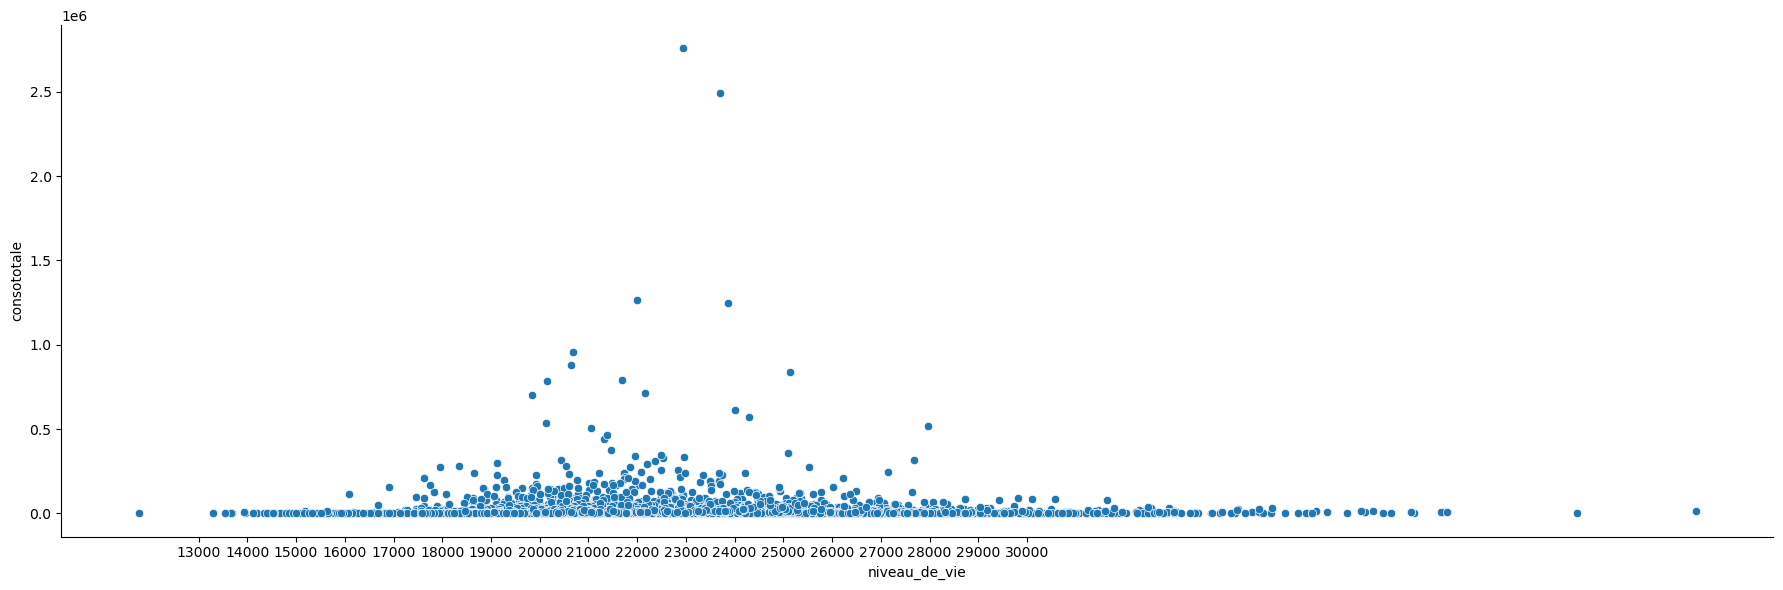

In [184]:
#graphique de statitistiques descriptives

# Import seaborn
import seaborn as sns
import numpy as np
# Apply the default theme
graph= sns.relplot(data= table_donnees, x="niveau_de_vie", y="consototale",height=6,aspect=3)

# Définissez les marques de l'axe des abscisses à intervalles de 1000
xticks_interval = np.arange(13000, 31000, 1000)
graph.ax.set_xticks(xticks_interval)

# Affichez le graphique
plt.show()

# Affichez le graphique
plt.show()

In [ ]:
#Max min
#Mt=table_donnees['tmoy'].max()
#mt=table_donnees['tmoy'].min()
#on distingue trois groupe de dépapartement selon la température pour observer les causalités et les correlations.
#table_donnees['grp_tmp']=[ "Chaud" if t > 2*(Mt-mt)/3 +mt  else ("Froid" if t < (Mt-mt)/3 +mt else "Doux") for t in table_donnees['tmoy']]


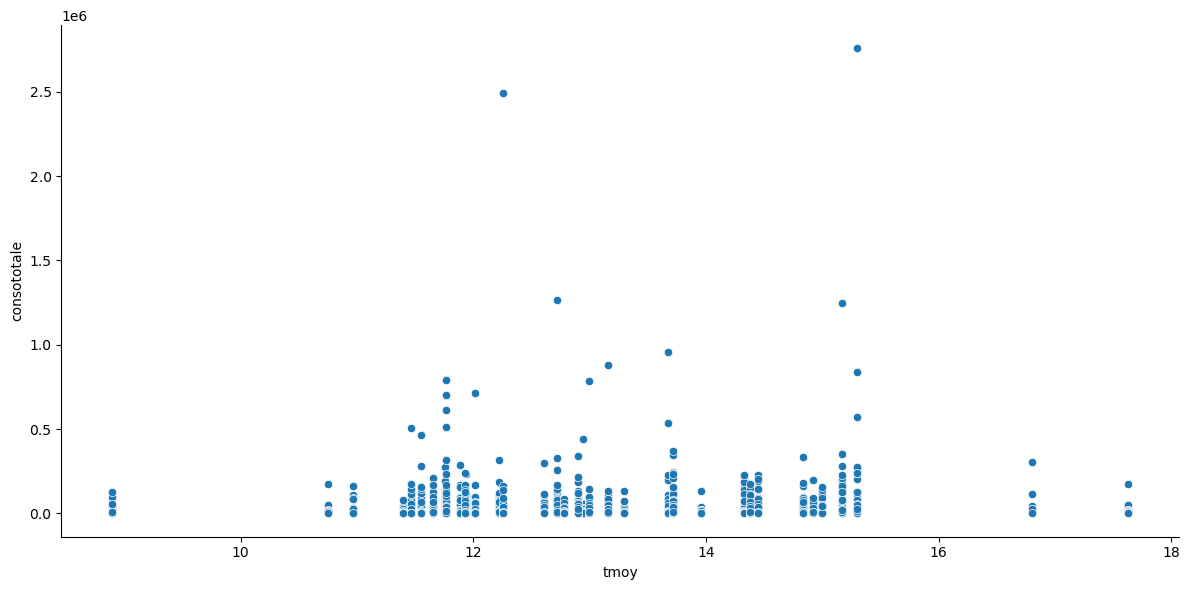

In [185]:
sns.relplot(data=table_donnees, y="consototale", x="tmoy", height=6, aspect=2)
#hue="grp_tmp",

In [ ]:
sns.pairplot(data=table_donnees)
#, hue="grp_tmp"

In [ ]:
# Carte de france avec les départements: conversion des donées pour une analyse en Geopadans

import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt

# Conversion des données "geom" qui sont en GEOJSON en données "géometry" que Geopanda peut traiter
#table_donnees['geometry'] = table_donnees['geom'].apply(lambda x: shape(x['geometry']))
#gdf = gpd.GeoDataFrame(table_donnees, geometry='geometry')

# Créez une figure et des axes
#fig, ax = plt.subplots(figsize=(12, 12))

# Affichez la carte à partir du GeoDataFrame
#gdf.plot(ax=ax, color='green', edgecolor='black')

# Supprimez les axes
#ax.set_axis_off()

# Supprimez les valeurs des axes x et y
#ax.set_xticks([])
#ax.set_yticks([])

# Ajoutez un titre à la carte
#plt.title("Départements")

# Affichez la carte
#plt.show()

#Il manque une dizaines de départements

In [ ]:
#Visualisation de la temperature par département

#from mpl_toolkits.axes_grid1 import make_axes_locatable

# Créez une figure et des axes
#fig, ax = plt.subplots(figsize=(12, 12))
# Tracé de la carte avec la couleur basée sur les températures 
#gdf.plot(column='temperature', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
# Ajout d'une barre de couleur :
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="2%", pad=0.1)
#sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=gdf['temperature'].min(), vmax=gdf['temperature'].max()))
#sm._A = []
#cbar = plt.colorbar(sm, cax=cax)

# Suppression des axes
#ax.set_axis_off()

# Ajouter un titre à la carte
#plt.suptitle("Carte de France - Températures des départements", fontsize=15, x=0.5, y=0.80)

# Afficher la carte
#plt.show()

In [ ]:
#Visualisation de la consommation d'électricté par département

#from mpl_toolkits.axes_grid1 import make_axes_locatable
#import matplotlib.pyplot as plt
#from matplotlib.colors import Normalize
#from matplotlib.cm import ScalarMappable
# Créez une figure et des axes
#fig, ax = plt.subplots(figsize=(12, 12))
# Ecart par rapport à la moyenne de consomation
#gdf['diff_moyenne'] = (gdf['consommation'] - gdf['consommation'].mean())
# Tracé de la carte avec la couleur basée sur les températures 
#gdf.plot(column='diff_moyenne', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8')
# Ajout d'une barre de couleur :
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="2%", pad=0.1)
#sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=plt.Normalize(vmax=gdf['diff_moyenne'].max(), vmin=gdf['diff_moyenne'].min()))
#sm._A = []
#cbar = plt.colorbar(sm, cax=cax)

# Suppression des axes
#ax.set_axis_off()

# Ajouter un titre à la carte
#plt.suptitle("Carte de France - Consommation électricité des départements", fontsize=15, x=0.5, y=0.80)

# Afficher la carte
#plt.show()

In [ ]:
#import folium
#import pandas as pd
#m = folium.Map(location=[46.6031, 1.8883], zoom_start=6)
#for index, row in table_donnees.iterrows():
#    folium.GeoJson(row['geom'], name=row['nom_departement']).add_to(m)
#m.save('carte.html')

## Comparaison par Secteur

## Analyse Géographique

In [ ]:
table_temperatures_com[['code_commune', 'tmoy']]

In [ ]:
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a


In [ ]:
# fond de carte metropole commune
import cartiflette.s3 as s3
metropole_communes = s3.download_vectorfile_url_all(
      values = "metropole",
      crs = 4326,
      borders = "COMMUNE",
      vectorfile_format="topojson",
      filter_by="FRANCE_ENTIERE",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)
metropole_communes.rename(columns={'INSEE_COM': 'code_commune'}, inplace=True)
metropole_communes = metropole_communes.drop('territoire', axis=1)

In [ ]:
# fond de carte Dom TOM
import cartiflette.s3 as s3
dom_tom_communes = s3.download_vectorfile_url_all(
      values = ["971","972","973","974"],
      crs = 4326,
      borders = "COMMUNE",
      vectorfile_format="topojson",
      filter_by="DEPARTEMENT",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)
dom_tom_communes.rename(columns={'INSEE_COM': 'code_commune'}, inplace=True)

In [ ]:
#france_communes=pd.concat([metropole_communes, dom_tom_communes], ignore_index=True)

In [ ]:
#Prb dom tom n'ont pas de température 
#carte_temp=pd.merge(table_temperatures_com[['code_commune', 'tmoy']],france_communes[["code_commune","geometry"]], on="code_commune", how= 'inner')


In [ ]:
carte_temp=pd.merge(table_temperatures_com[['code_commune', 'tmoy']],metropole_communes[["code_commune","geometry"]], on="code_commune", how= 'inner')

In [ ]:
#Visualisation de la temperature par département
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


gdf = gpd.GeoDataFrame(carte_temp, geometry='geometry')
#Créez une figure et des axes
fig, ax = plt.subplots(figsize=(30,30))
# Tracé de la carte avec la couleur basée sur les températures 
gdf.plot(column='tmoy', cmap='coolwarm', linewidth=0.05, ax=ax, edgecolor='0.8')
# Ajout d'une barre de couleur :
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=gdf['tmoy'].min(), vmax=gdf['tmoy'].max()))
sm._A = []
cbar = plt.colorbar(sm, cax=cax)

# Suppression des axes
ax.set_axis_off()

# Ajouter un titre à la carte
plt.suptitle("Carte de France - Températures des départements", fontsize=15, x=0.5, y=0.80)

# Afficher la carte
plt.show()

In [ ]:
#Visualisation de la temperature par département DOM TOM ET METROPLE SUR LA MEME CARTE
#import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#pip install --upgrade geopandas matplotlib

#temp_france=pd.merge(table_temperatures_com[['code_commune', 'tmoy']],metropole_communes[["code_commune","geometry"]], on="code_commune", how= 'inner')
#temp_dom_tom =pd.merge(table_temperatures_com[['code_commune', 'tmoy']],dom_tom_communes[["code_commune","geometry"]], on="code_commune", how= 'inner')
#fr = gpd.GeoDataFrame(temp_france, geometry='geometry')
#dt = gpd.GeoDataFrame(temp_dom_tom, geometry='geometry')
#dt = dt.to_crs(fr.crs)
#Créez une figure et des axes
#fig, ax = plt.subplots(figsize=(10,10))
# Tracé de la carte avec la couleur basée sur les températures 
#fr.plot(column='tmoy', cmap='coolwarm', linewidth=0.05, ax=ax, edgecolor='0.8')
#dt.plot(column='tmoy', cmap='coolwarm', linewidth=0.05, ax=ax, edgecolor='0.8')

# Ajout d'une barre de couleur :
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="2%", pad=0.1)
#sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=gdf['tmoy'].min(), vmax=gdf['tmoy'].max()))
#sm._A = []
#cbar = plt.colorbar(sm, cax=cax)

# Suppression des axes
#ax.set_axis_off()

# Ajouter un titre à la carte
#plt.suptitle("Carte de France - Températures des départements", fontsize=15, x=0.5, y=0.80)

# Afficher la carte
#plt.show()

# 6. Modélisation et Prédictions

## Choix des Modèles

## Entraînement et Test

### Entrainement de nombreux modèles

In [ ]:
!pip install statsmodels
!pip install ipywidgets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from itertools import combinations
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
table_donnees_pred=table_donnees.drop(['code_commune', 'libelle_commune'],axis=1)

# Séparation des variables indépendantes et dépendantes
y = table_donnees_pred['consototale']
X = table_donnees_pred.drop(['consototale'], axis=1)

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionnaire pour stocker les erreurs des modèles
model_errors = {}

# Modèles à tester
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "Neural Network": MLPRegressor(max_iter=1000)  # Augmentation du nombre d'itérations pour une meilleure convergence
}

# Entraînement et évaluation de chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_errors[name] = mse
    print(f"{name}: MSE = {mse}")

# Trouver le modèle avec l'erreur la plus faible
best_model = min(model_errors, key=model_errors.get)
print(f"\nMeilleur modèle: {best_model} avec une MSE de {model_errors[best_model]}")



Possible problème, à discuter et corriger.
- Échelle des données ?

### Régressions linéaires pour l'interprétabilité

##### Méthode exhaustive de sélection de variables

In [ ]:
# Transformation des données pour différentes combinaisons
def transform_data(df, transformation):
    transformed_df = df.copy()
    for col in df.columns:
        # Vérifier si la colonne est numérique avant d'appliquer une transformation
        if pd.api.types.is_numeric_dtype(df[col]):
            if transformation == "log" and df[col].min() > 0:
                transformed_df[col] = np.log(df[col])
            elif transformation == "squared":
                transformed_df[col] = np.square(df[col])
    return transformed_df


# Sélection exhaustive des variables pour la régression linéaire
def best_feature_combination(table_donnees, target_column):
    best_aic = float('inf')
    best_bic = float('inf')
    best_combination = None
    best_transformation = None
    features = [col for col in table_donnees.columns if col != target_column]

    for transformation in ["log", "squared", "none"]:
        transformed_table = transform_data(table_donnees, transformation) if transformation != "none" else table_donnees

        for L in range(1, len(features) + 1):
            for subset in combinations(features, L):
                X = transformed_table[list(subset)]
                y = transformed_table[target_column]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
                aic = model.aic
                bic = model.bic

                if aic < best_aic and bic < best_bic:
                    best_aic = aic
                    best_bic = bic
                    best_combination = subset
                    best_transformation = transformation

    return best_combination, best_transformation, best_aic, best_bic

best_features, best_transformation, best_aic, best_bic = best_feature_combination(table_donnees_pred, 'consototale')

# Affichage des meilleurs résultats
print(f"Meilleures caractéristiques: {best_features}")
print(f"Meilleure transformation: {best_transformation}")
print(f"Meilleur AIC: {best_aic}")
print(f"Meilleur BIC: {best_bic}")



##### Stats descriptives des variables identifiées

In [ ]:
# Configuration des graphiques
sns.set(style="whitegrid")

# Histogrammes
plt.figure(figsize=(15, 6))
for i, col in enumerate(['nombre_entreprises', 'niveau_de_vie', 'population']):
    plt.subplot(1, 3, i+1)
    sns.histplot(table_donnees_pred[col], kde=True)
    plt.title(f'Histogramme de {col}')
plt.tight_layout()
plt.show()

# Diagrammes de dispersion
plt.figure(figsize=(15, 6))
for i, col in enumerate(['nombre_entreprises', 'niveau_de_vie', 'population']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=table_donnees_pred, x=col, y='consototale')
    plt.title(f'{col} vs consototale')
plt.tight_layout()
plt.show()

# Heatmap de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(table_donnees_pred.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()



##### Entrainement du modèle sélectionné

In [ ]:
import warnings
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from IPython.display import display, Latex, HTML


# Ignorer les avertissements pour une sortie propre
warnings.filterwarnings('ignore')

# Fonction pour transformer les données
def transform_data(df, transformation):
    transformed_df = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            if transformation == "log" and df[col].min() > 0:
                transformed_df[col] = np.log(df[col])
            elif transformation == "squared":
                transformed_df[col] = np.square(df[col])
    return transformed_df

# Transformation des données
transformed_data = transform_data(table_donnees_pred, 'log')

# Sélectionner les meilleures caractéristiques pour le modèle
X = transformed_data[['nombre_entreprises', 'niveau_de_vie', 'population']]
y = transformed_data['consototale']

# Entraînement du modèle de régression linéaire
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Récupération des coefficients
coefficients = model.params
intercept = coefficients[0]
coef = coefficients[1:]

# Formatage de l'équation de régression pour l'affichage en LaTeX
model_eq = r"$$\text{consototale} = "
model_eq += f"{intercept:.2f} "
for var, beta in zip(['nombre_entreprises', 'niveau_de_vie', 'population'], coef):
    sign = '+' if beta >= 0 else ''
    model_eq += f" {sign} {beta:.2f} \log({var}) "
model_eq += r"$$"

print("Modèle de régression linéaire :")
display(Latex(model_eq))



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Préparation des données avec la meilleure combinaison et transformation
transformed_table = transform_data(table_donnees, best_transformation)
X = transformed_table[list(best_features)]
y = transformed_table['consototale']

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Affichage des résultats du modèle
print(model.summary())

# Prédiction sur l'ensemble de test
y_pred = model.predict(sm.add_constant(X_test))

# Visualisation des résidus
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Résidus vs Valeurs Prédites')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.show()

# Diagramme de dispersion pour montrer les prédictions par rapport aux valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # ligne de référence
plt.title('Valeurs Réelles vs Prédites')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.show()


##### Une petite application de prédiction

In [ ]:
#APPLICATION TEXTUELLE

def predict_consototale(population, niveau_de_vie, nombre_entreprises, model):
    # Transformation des entrées
    log_population = np.log(population)
    log_niveau_de_vie = np.log(niveau_de_vie)
    log_nombre_entreprises = np.log(nombre_entreprises)
    
    # Préparation des données pour la prédiction
    X_pred = np.array([[1, log_nombre_entreprises, log_niveau_de_vie, log_population]])  # Ajoutez '1' pour la constante
    
    # Prédiction en utilisant le modèle
    prediction = model.predict(X_pred)[0]
    return prediction

# Assurez-vous que 'model' est votre modèle entraîné
# model = ...

# Demande de saisie des valeurs à l'utilisateur
population = float(input("Entrez la population: "))
niveau_de_vie = float(input("Entrez le niveau de vie: "))
nombre_entreprises = float(input("Entrez le nombre d'entreprises: "))

# Prédiction de la consototale
consototale_estimee = predict_consototale(population, niveau_de_vie, nombre_entreprises, model)

print(f"La consototale estimée est : {consototale_estimee:.1f}")



In [ ]:
# APPLICATION WIDGET

import ipywidgets as widgets

def predict_consototale(population, niveau_de_vie, nombre_entreprises, model):
    log_population = np.log(population)
    log_niveau_de_vie = np.log(niveau_de_vie)
    log_nombre_entreprises = np.log(nombre_entreprises)
    X_pred = np.array([[1, log_nombre_entreprises, log_niveau_de_vie, log_population]])
    prediction = model.predict(X_pred)[0]
    return prediction

def on_predict(b):
    try:
        population = float(population_input.value)
        niveau_de_vie = float(niveau_de_vie_input.value)
        nombre_entreprises = float(nombre_entreprises_input.value)
        consototale_estimee = predict_consototale(population, niveau_de_vie, nombre_entreprises, model)
        output.clear_output()
        with output:
            print(f"La consototale estimée est : {consototale_estimee}")
    except ValueError as e:
        output.clear_output()
        with output:
            print("Erreur : Veuillez entrer des valeurs numériques valides.")

population_input = widgets.FloatText(value=0, description='Population:')
niveau_de_vie_input = widgets.FloatText(value=0, description='Niv de vie:')
nombre_entreprises_input = widgets.FloatText(value=0, description='Nb Etp:')

predict_button = widgets.Button(description="Prédire")
predict_button.on_click(on_predict)

output = widgets.Output()

display(population_input, niveau_de_vie_input, nombre_entreprises_input, predict_button, output)


# 7. Évaluation des Résultats

## Interprétation des Modèles

## Mesures de Performance 

# 8. Synthèse et Recommandations

## Conclusions Clés 

## Recommandations